In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

In [2]:
# 0.1 General Algorithm Function Define

def avg(x):
    '''
    Returns average value of list of int/float.
    ------------------------------------------
    input:
        x: must be a list
    '''
    return sum(x)/len(x)

In [3]:
# 1.1 rainfall simulation

def fit_precip(x, A, B, C, D):
    '''
    Fitted precip exponential model.
    '''
    return A * np.exp(-B * (x - C)**2) + D


# 1.1.2 rainfall data from 2019-2022

A = [26.9, 99.1, 37.7, 32.7]               # max rainfall
B = [0.00244, 0.00114, 0.000465, 0.00013]  # coefficients for contoling a bell shape
C = [243, 217, 200, 258]                   # date with max rainfall
D = [0, 0, 0, 0]                           # min rainfall

# 1.1.3 inital setting

A0 = avg(A)  # average of A
B0 = avg(B)  # average of B
C0 = avg(C)  # average of C
D0 = avg(D)  # average of D

t = np.linspace(1, 365, num = 365, dtype = int) # x axis：one year period with 365 days

# 1.1.4 rainfall simulation under 4 cases

## original 
h0 = fit_precip(t, A0, B0, C0, D0)

## drought
h1 = fit_precip(t, A0/3, B0, C0, D0)

## greater frequency of dought
C2 = (C0 - 50.75, C0, C0 + 50.75)  

h2_left = fit_precip(t, A0/2.5, B0*2, C2[0], D0)
h2_middle = fit_precip(t, A0/2.5, B0*2, C2[1], D0)
h2_right = fit_precip(t, A0/2.5, B0*2, C2[2], D0)

h2 = h2_left + h2_middle + h2_right

## wider variation of drought
C3 = (196, 263) 

h3_left = fit_precip(t, A0/2, B0*8, C3[0], D0)
h3_right = fit_precip(t, A0/4, B0*8, C3[1], D0)
h3 = h3_left + h3_right

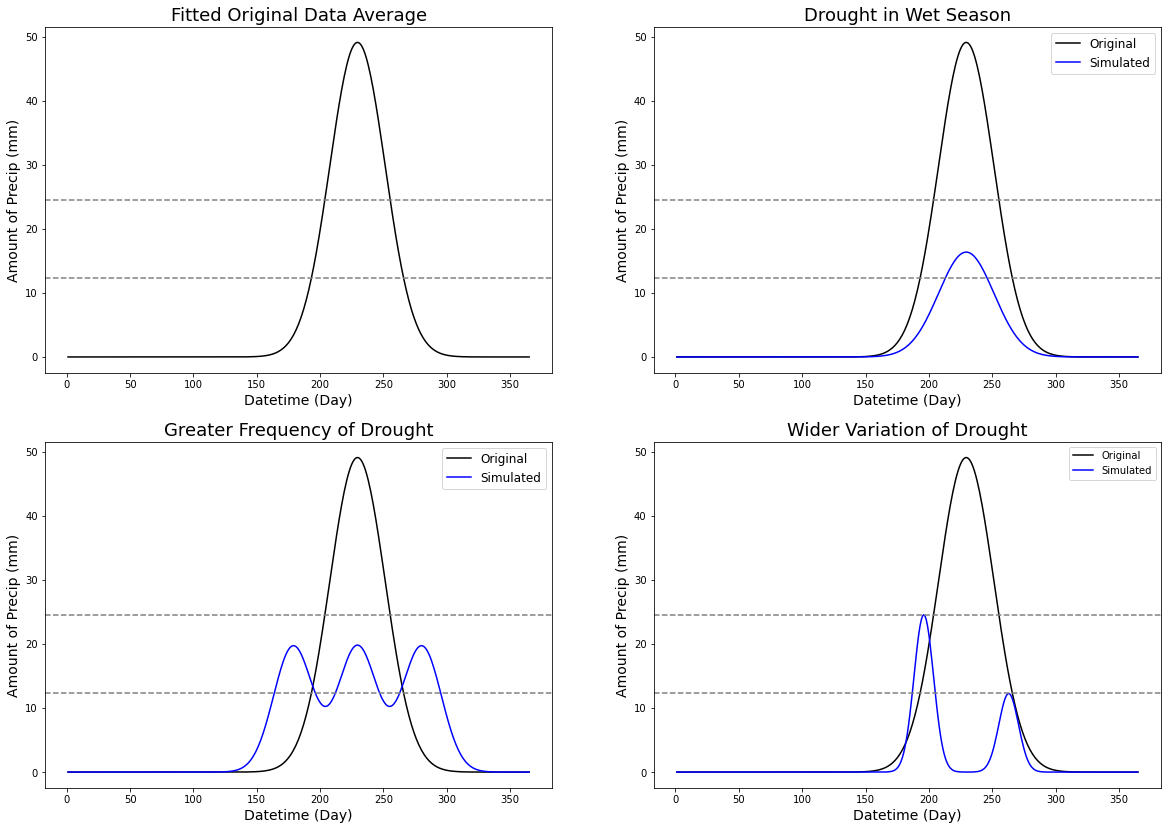

In [4]:

fig, ax = plt.subplots(2, 2, figsize = (20, 14))

# fig 1.1
ax[0, 0].plot(t, h0, 'k-', label = 'Original')
ax[0, 0].axhline(y = A0/2, color = 'grey', linestyle = '--')
ax[0, 0].axhline(y = A0/4, color = 'grey', linestyle = '--')

ax[0, 0].set_title('Fitted Original Data Average', fontsize = 18)
ax[0, 0].set_xlabel('Datetime (Day)', fontsize = 14)
ax[0, 0].set_ylabel('Amount of Precip (mm)', fontsize = 14)

# fig 1.2
ax[0, 1].plot(t, h0, 'k-', label = 'Original')
ax[0, 1].plot(t, h1, 'b-', label = 'Simulated')
ax[0, 1].axhline(y = A0/2, color = 'grey', linestyle = '--')
ax[0, 1].axhline(y = A0/4, color = 'grey', linestyle = '--')

ax[0, 1].set_title('Drought in Wet Season', fontsize = 18)
ax[0, 1].set_xlabel('Datetime (Day)', fontsize = 14)
ax[0, 1].set_ylabel('Amount of Precip (mm)', fontsize = 14)
ax[0, 1].legend(loc = 'upper right', fontsize = 12)

# fig 1.3
ax[1, 0].plot(t, h0, 'k-', label = 'Original')
ax[1, 0].plot(t, h2, 'b-', label = 'Simulated')
ax[1, 0].axhline(y = A0/2, color = 'grey', linestyle = '--')
ax[1, 0].axhline(y = A0/4, color = 'grey', linestyle = '--')

ax[1, 0].set_title('Greater Frequency of Drought', fontsize = 18)
ax[1, 0].set_xlabel('Datetime (Day)', fontsize = 14)
ax[1, 0].set_ylabel('Amount of Precip (mm)', fontsize = 14)
ax[1, 0].legend(loc = 'upper right', fontsize = 12)

# fig 1.4
ax[1, 1].plot(t, h0, 'k-', label = 'Original')
ax[1, 1].plot(t, h3, 'b-', label = 'Simulated')
ax[1, 1].axhline(y = A0/2, color = 'grey', linestyle = '--')
ax[1, 1].axhline(y = A0/4, color = 'grey', linestyle = '--')

ax[1, 1].set_title('Wider Variation of Drought', fontsize = 18)
ax[1, 1].set_xlabel('Datetime (Day)', fontsize = 14)
ax[1, 1].set_ylabel('Amount of Precip (mm)', fontsize = 14)
ax[1, 1].legend(loc = 'upper right', fontsize = 12)

plt.legend(loc = "upper right")
plt.show()

In [6]:
# 1.2 there relationships without considering the rainfall

# 1.2.1 （competition relationship)  

## Initial data setting

t0 = 0   # initial time
n = 365  # number of steps
h = 1    # stepsize

N1_inv = 0.002  # x1 max carrying capacity 
N2_inv = 0.003  # x2 max carrying capacity

r1 = 0.1  # x1 natural growth rate
r2 = 0.3  # x2 natural growth rate

a1 = 0.0001  # x1 competition coefficient
a2 = 0.0002  # x2 competition coefficient

x1_0 = 100  # x1 initial value
x2_0 = 150  # x2 initial value

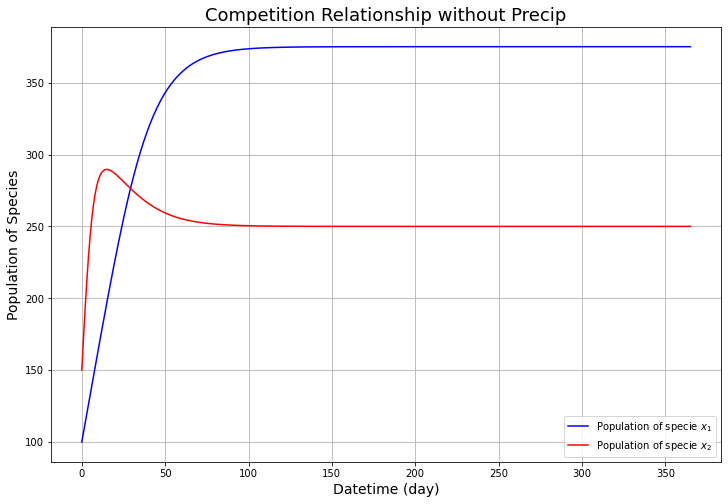

In [7]:
## Modeling

def dx_dt_competition(x, t, r1, N1_inv, a1, r2, N2_inv, a2):
    '''
    Define system of ODE in competition relationship
    '''
    x1, x2 = x
    
    dx1_dt = r1*x1*(1-x1*N1_inv) - a1*x1*x2
    dx2_dt = r2*x2*(1-x2*N2_inv) - a2*x1*x2
    
    return np.array([dx1_dt, dx2_dt])


t = np.linspace(t0, t0+h*n, n, dtype = int)  # define time points
x_initial = np.array([x1_0, x2_0])  # set initial conditions

x_sol_competition = odeint(dx_dt_competition, x_initial, t, args = (r1, N1_inv, a1, r2, N2_inv, a2))  

x1_sol = x_sol_competition[:, 0]  # x1 without considering rainfall
x2_sol = x_sol_competition[:, 1]  # x2 without considering rainfall

plt.figure(figsize = (12,8))

plt.plot(t, x1_sol, 'b-', label = 'Population of specie $x_1$')
plt.plot(t, x2_sol, 'r-', label = 'Population of specie $x_2$')

plt.title('Competition Relationship without Precip', fontsize = 18)
plt.xlabel('Datetime (day)', fontsize = 14)
plt.ylabel('Population of Species', fontsize = 14)
plt.legend(loc = 'lower right')

plt.grid()
plt.show()

In [8]:
# 1.2.2（parastism relationship)    

## Initial data setting

t0 = 0   # initial time
n = 365  # number of steps
h = 1    # stepsize

r3 = 0.2  # x3 natural growth rate
r4 = 0.43 # x4 natural growth rate

x3_0 = 50  # x3 initial value
x4_0 = 80  # x4 initial value

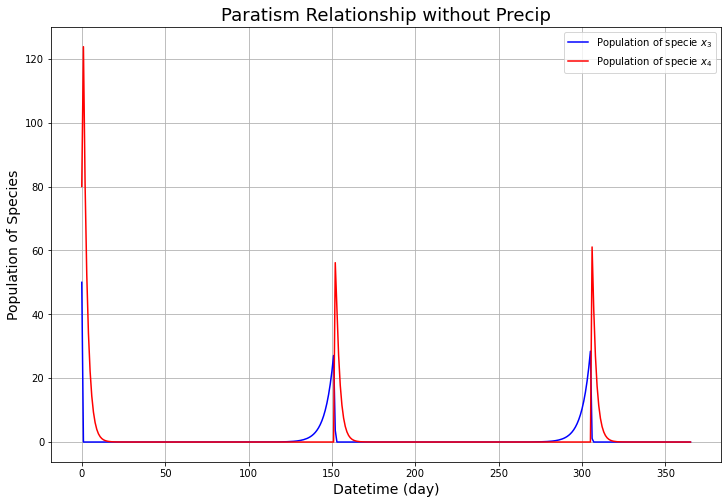

In [9]:
#Modeling
def dx_dt_paratism(x, t, r3, r4):
    '''
    Define system of ODE in paratism relationship
    '''
    x3, x4 = x
    
    dx3_dt = r3*x3*(1-x4)
    dx4_dt = r4*x4*(x3-1)
    
    return np.array([dx3_dt, dx4_dt])


t = np.linspace(t0, t0+h*n, n, dtype = int)  # define time points
x_initial = np.array([x3_0, x4_0])  # set initial conditions

x_sol_paralism = odeint(dx_dt_paratism, x_initial, t, args = (r3, r4))  

x3_sol = x_sol_paralism[:, 0]  # x3 without considering the rainfall
x4_sol = x_sol_paralism[:, 1]  # x4 without considering the rainfall


plt.figure(figsize = (12,8))

plt.plot(t, x3_sol, 'b-', label = 'Population of specie $x_3$')
plt.plot(t, x4_sol, 'r-', label = 'Population of specie $x_4$')

plt.title('Paratism Relationship without Precip', fontsize = 18)
plt.xlabel('Datetime (day)', fontsize = 14)
plt.ylabel('Population of Species', fontsize = 14)
plt.legend(loc = 'upper right')

plt.grid()
plt.show()

In [10]:
# 1.2.3 （commensalism relationship)    

## Initial data setting

t0 = 0   # initial time
n = 365  # number of steps
h = 1    # stepsize

r5 = 0.5  # x5 natural growth rate
r6 = 0.35 # x natural growth rate

gamma5 = 0.009
gamma6 = 0.003
delta5 = 0.009

x5_0 = 75  # x5 initial value
x6_0 = 40  # x6 initial value

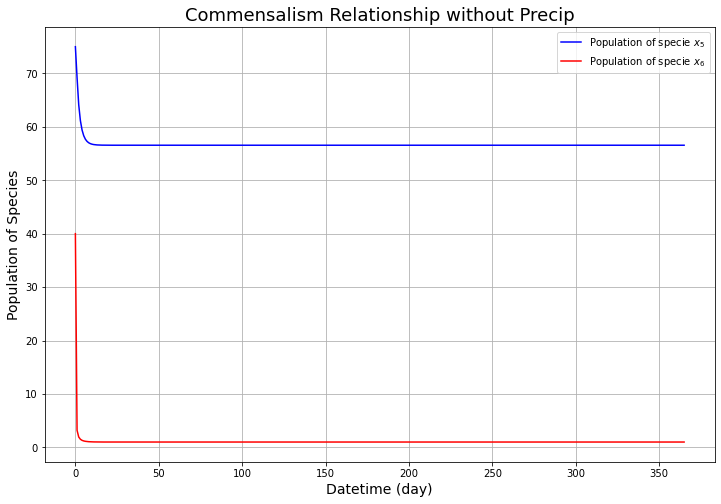

In [11]:
## Modeling

def dx_dt_commensalism(x, t, r5, gamma5, delta5, r6, gamma6):
    '''
    Define system of ODE in commensalism relationship
    '''
    x5, x6 = x
    
    dx5_dt = r5*x5 - gamma5*x5**2 + delta5*x5*x6
    dx6_dt = r6*x6 - r6*x6**2
    
    return np.array([dx5_dt, dx6_dt])


t = np.linspace(t0, t0+h*n, n, dtype = int)  # define time points
x_initial = np.array([x5_0, x6_0])  # set initial conditions

x_sol_commensalism = odeint(dx_dt_commensalism, x_initial, t, args = (r5, gamma5, delta5, r6, gamma6))  # use odeint to solve

x5_sol = x_sol_commensalism[:, 0]  # x5 without cosnsidering the rainfall
x6_sol = x_sol_commensalism[:, 1]  # x6 without considering the rainfall


## visualization

plt.figure(figsize = (12,8))

plt.plot(t, x5_sol, 'b-', label = 'Population of specie $x_5$')
plt.plot(t, x6_sol, 'r-', label = 'Population of specie $x_6$')

plt.title('Commensalism Relationship without Precip', fontsize = 18)
plt.xlabel('Datetime (day)', fontsize = 14)
plt.ylabel('Population of Species', fontsize = 14)
plt.legend(loc = 'upper right')

plt.grid()
plt.show()

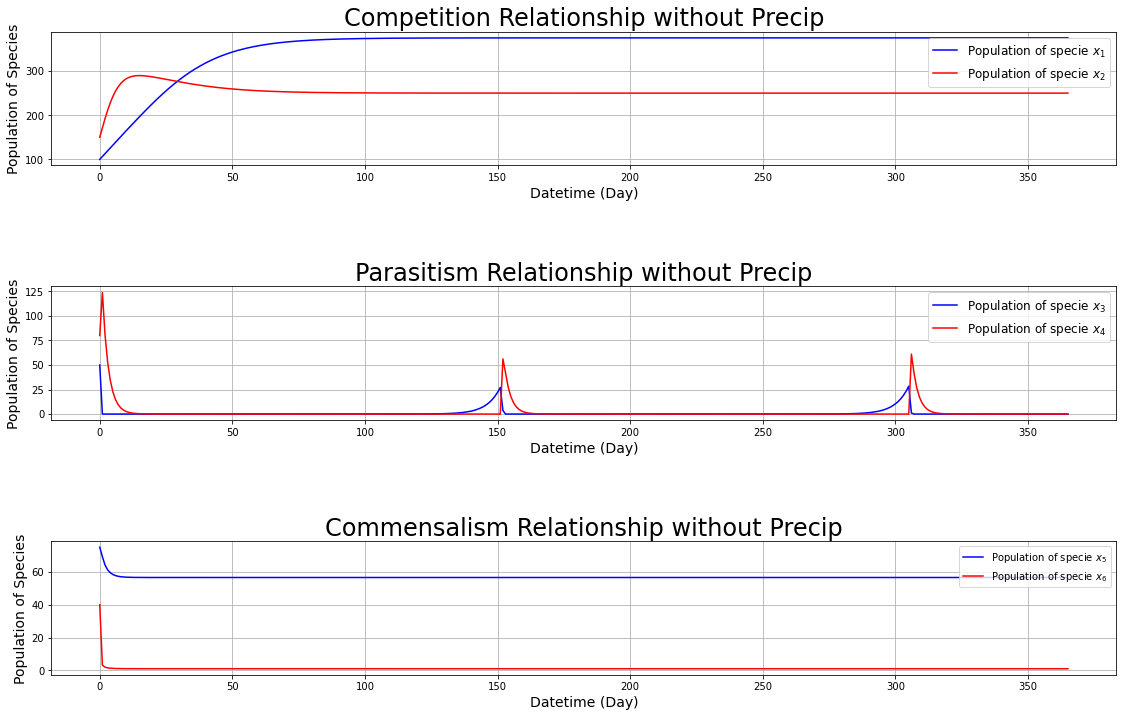

In [12]:
# 1.2.4 visualization

t0 = 0
h = 1
n = 365
t = np.linspace(t0, t0+h*n, n, dtype = int)

fig, ax = plt.subplots(3, 1, figsize = (18, 12))
fig.tight_layout(pad = 10.0)

# fig 1.1
ax[0].plot(t, x1_sol, 'b-', label = 'Population of specie $x_1$')
ax[0].plot(t, x2_sol, 'r-', label = 'Population of specie $x_2$')

ax[0].set_title('Competition Relationship without Precip', fontsize = 24)
ax[0].set_xlabel('Datetime (Day)', fontsize = 14)
ax[0].set_ylabel('Population of Species', fontsize = 14)
ax[0].legend(loc = 'upper right', fontsize = 12)
ax[0].grid()

# fig 1.2
ax[1].plot(t, x3_sol, 'b-', label = 'Population of specie $x_3$')
ax[1].plot(t, x4_sol, 'r-', label = 'Population of specie $x_4$')

ax[1].set_title('Parasitism Relationship without Precip', fontsize = 24)
ax[1].set_xlabel('Datetime (Day)', fontsize = 14)
ax[1].set_ylabel('Population of Species', fontsize = 14)
ax[1].legend(loc = 'upper right', fontsize = 12)
ax[1].grid()

# fig 1.3
ax[2].plot(t, x5_sol, 'b-', label = 'Population of specie $x_5$')
ax[2].plot(t, x6_sol, 'r-', label = 'Population of specie $x_6$')

ax[2].set_title('Commensalism Relationship without Precip', fontsize = 24)
ax[2].set_xlabel('Datetime (Day)', fontsize = 14)
ax[2].set_ylabel('Population of Species', fontsize = 14)
ax[2].legend(loc = 'upper right', fontsize = 12)
ax[2].grid()

plt.legend(loc = "upper right")
plt.show()

In [13]:
# 1.3 Model 1 consider with the rainfall

def RK4(f, t0, y0, h, n):
    '''
    Estimate ODE by Runge-Kutta method.
    -------------------------------------
    inputs:
        f: ODE function, first derivative
        t0: initial time
        y0: initial values
        h: stepsize
        n: number of steps
    output:
        y: list of numerical solutions
    '''
    # List ready to store
    y = [y0]
    
    # time array
    t = np.linspace(t0, t0+h*n, n+1, dtype = int)
    
    # RK4 steps
    for i in range(len(t)):
        k1 = y[i]
        k2 = f(y[i] + k1*h/2, t[i] + h/2)
        k3 = f(y[i] + k2*h/2, t[i] + h/2)
        k4 = f(y[i] + k3*h, t[i] + h)
        
        y.append(y[i] + 1/6 * (k1 + 2*k2 + 2*k3 + k4) * h)
        
    return y, t


def growth_rate(t, L, k):
    '''
    Returns a len(L)*len(t) or len(k)*len(t) matrix of natural growth rate r
    ------------------------------------------------------------------------
    input:
        h: Amount of precip, np.array, len = 365
        L: List of species maximum growth rate, len(L) = len(k) = 6
        k: List of Logistic growth rate
    output:
        r: len(L)*len(t) matrix of natural growth rate
    '''
    # zero matrix ready to store
    r = np.zeros([len(L), len(t)])
    
    # Precip
    h = fit_precip(t, A0, B0, C0, D0)
    
    # Loop: calculate each r
    for i in range(len(L)):
        for j in range(len(t)):
            r[i,j] = (L[i] / (1 + np.exp(-k[i]*h[j]))) - (L[i] / 2)
            
    return r

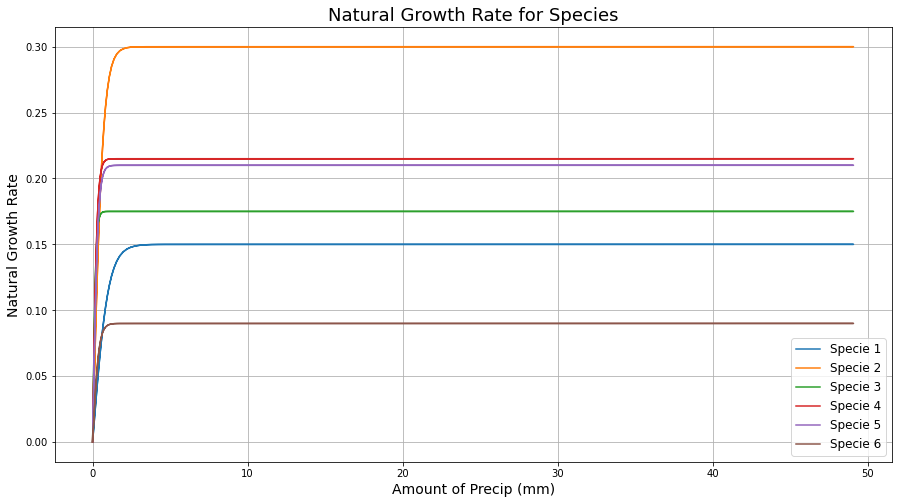

In [14]:
# 1.3.2 Natural growth rate vs time

## Initial setting

t0 = 0                                        # initial time
h = 1                                         # stepsize
n = 365                                       # number of steps

t = np.linspace(t0, t0+h*n, n+1, dtype = int)   # time points

h0 = fit_precip(t, A0, B0, C0, D0)            # amount of precip from average original data
L = [0.3, 0.6, 0.35, 0.43, 0.42, 0.18]
k = [2, 3, 10, 7, 6, 5]

## Calculate growth rate

r_132 = growth_rate(t, L, k)

## visualization

plt.figure(figsize = (15,8))

for i in range(len(r_132)):
    plt.plot(h0, r_132[i], '-', label = f'Specie {i+1}')
    
     
plt.title('Natural Growth Rate for Species', fontsize = 18)
plt.xlabel('Amount of Precip (mm)', fontsize = 14)
plt.ylabel('Natural Growth Rate', fontsize = 14)
plt.legend(loc = 'lower right', fontsize = 12)
plt.grid()
plt.show()

In [16]:
# 1.3.3 the case which considers the rainfall


# 1.3.4 Assuming all relationships are Competition

a = np.array([[0, 6.74e-4, 6.05e-4, 5.44e-4, 2.54e-4, 7.16e-4],
              [2.87e-4, 0, 1.41e-4, 3.74e-4, 1.16e-4, 5.43e-4],
              [2.47e-4, 4.49e-4, 0, 6.60e-4, 3.05e-4, 4.45e-4],
              [8.00e-4, 3.51e-4, 4.68e-4, 0, 7.56e-4, 6.59e-4],
              [6.15e-4, 2.16e-4, 2.91e-4, 3.38e-4, 0, 4.24e-4],
              [2.08e-4, 2.05e-4, 4.92e-4, 3.31e-4, 2.40e-4, 0]])

N = [100, 50, 120, 130, 80, 30]



def ode_RK4(f, X_0, dt, T):    
    N_t = int(round(T/dt))
    # Initial conditions
    usol = [X_0]
    u = np.copy(X_0)
    
    tt = np.linspace(0, N_t*dt, N_t + 1)
    # RK4
    for t in tt[:-1]:
        u1 = f(u + 0.5*dt* f(u, t), t + 0.5*dt)
        u2 = f(u + 0.5*dt*u1, t + 0.5*dt)
        u3 = f(u + dt*u2, t + dt)
        u = u + (1/6)*dt*( f(u, t) + 2*u1 + 2*u2 + u3)
        usol.append(u)
    return usol, tt

def f(u,t):
    x1,x2,x3,x4,x5,x6= u
    
    r1 = 0.3/(1+  np.exp(-2* t  )) - 0.3/2
    r2 = 0.6/(1+  np.exp(-3* t  )) - 0.6/2
    r3 = 0.35/(1+  np.exp(-10* t  )) - 0.35/2
    r4 = 0.43/(1+  np.exp(-7*  t  )) - 0.43/2
    r5 = 0.42/(1+  np.exp(-6*  t  )) - 0.42/2
    r6 = 0.18/(1+  np.exp(-5*  t  )) - 0.18/2
    
    r = [r1, r2, r3, r4, r5, r6]
    x = [x1, x2, x3, x4, x5, x6]
    
    d = []
    for i in range(6):
        d.append(r[i]*x[i]* (1 - x[i]/N[i] - a[i,0]*x[0]/N[0] - a[i,1]*x[1]/N[1] - a[i,2]*x[2]/N[2] - a[i,3]*x[3]/N[3] - a[i,4]*x[4]/N[4] - a[i,5]*x[5]/N[5]))
    
    return np.asarray(d)


def fig2():
    global u1,u2,u3,u4,u5,u6
    u, t = ode_RK4(f, np.array([100,150,50,80,75,40]), 1, 365)
    u1 = [a[0] for a in u]
    u2 = [b[1] for b in u]
    u3 = [c[2] for c in u]
    u4 = [d[3] for d in u]
    u5 = [e[4] for e in u]
    u6 = [f[5] for f in u]
    
    return u1, u2, u3, u4, u5, u6


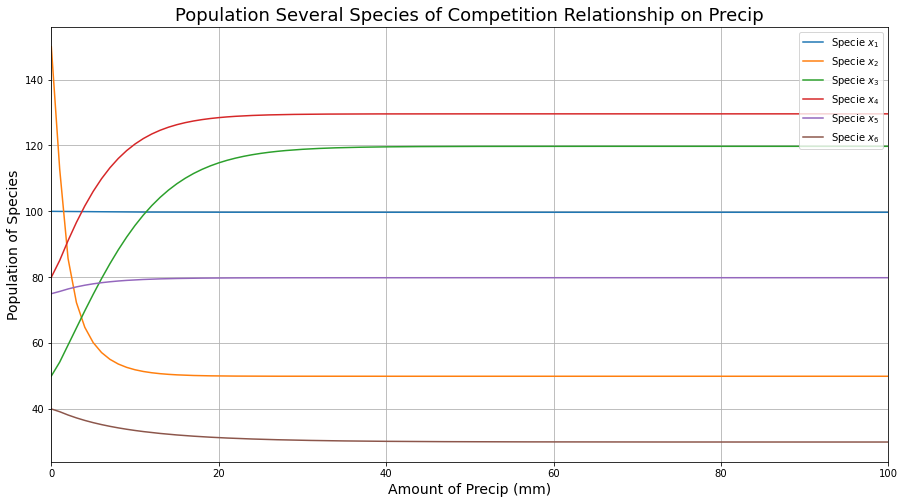

In [17]:
x1, x2, x3, x4, x5, x6 = fig2()

t = np.linspace(0, 365, 366)


plt.figure(figsize = (15, 8))

plt.plot(t, x1, '-', label = "Specie $x_1$")
plt.plot(t, x2, '-', label = "Specie $x_2$")
plt.plot(t, x3, '-', label = "Specie $x_3$")
plt.plot(t, x4, '-', label = "Specie $x_4$")
plt.plot(t, x5, '-', label = "Specie $x_5$")
plt.plot(t, x6, '-', label = "Specie $x_6$")

plt.xlim(0,100)
plt.title('Population Several Species of Competition Relationship on Precip', fontsize = 18)
plt.xlabel('Amount of Precip (mm)', fontsize = 14)
plt.ylabel('Population of Species', fontsize = 14)


plt.grid()
plt.legend(loc = 'upper right')
plt.show()